In [1]:
import cv2
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CATEGORIES = ['Cat', 'Dog']


def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr

model = keras.models.load_model('catdog.model')

In [3]:
# method 1 which predcit single image 
# give file for the testing data 
prediction = model.predict([image('CatDogClassification/dogscats/test1/120.jpg')])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 400ms/step
Cat


1/1 [==============================] - 0s 93ms/step
Dog


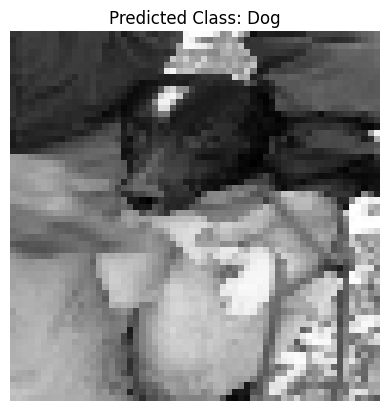

1/1 [==============================] - 0s 30ms/step
Cat


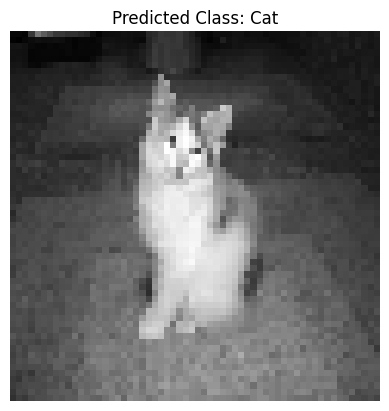

1/1 [==============================] - 0s 45ms/step
Dog


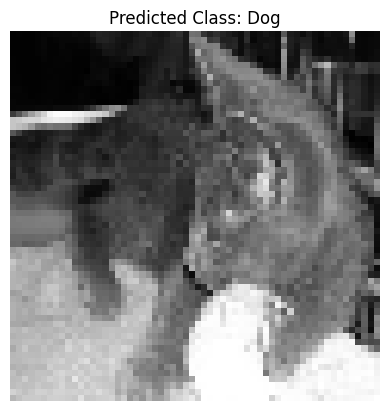

1/1 [==============================] - 0s 46ms/step
Dog


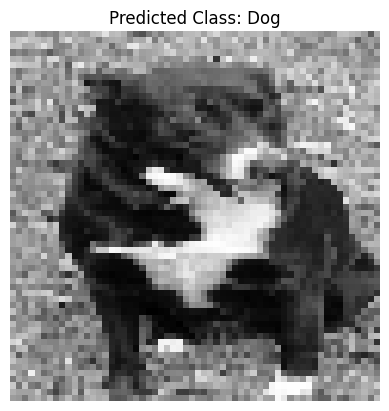

1/1 [==============================] - 0s 30ms/step
Dog


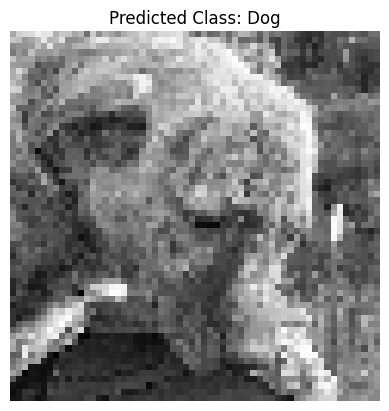

In [39]:
import os

CATEGORIES = ['Cat', 'Dog']
def process_images_in_folder(folder_path, num_images):
    image_list = [] 
    for filename in os.listdir(folder_path):
        if num_images <= 0:
            break  
        if filename.endswith(".jpg"):  
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:  
                img = cv2.resize(img, (60, 60))
                img = np.array(img)
                img = img.reshape(-1,60, 60, 1)
                image_list.append(img)
                num_images -= 1  
    return np.array(image_list)  

model = keras.models.load_model('catdog.model')

#  method two which predict for all the images provide at given folder path
num_images_to_process = 5
folder_path = 'CatDogClassification/dogscats/test1/'

processed_images = process_images_in_folder(folder_path, num_images_to_process)

for img in processed_images:
    prediction = model.predict([img])
    print(CATEGORIES[prediction.argmax()])
    predicted_class = CATEGORIES[prediction.argmax()]
    
    plt.figure()
    plt.imshow(np.squeeze(img), cmap='gray')  
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()